In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
print(type(X_train))
print(X_train[0].shape)

<class 'numpy.ndarray'>
(28, 28)


In [7]:
print("Training data set : ", X_train.shape)
print("Test data set : ", X_test.shape)
print("Training labels : ", Y_train.shape)
print("Test labels : ", Y_test.shape)

Training data set :  (60000, 28, 28)
Test data set :  (10000, 28, 28)
Training labels :  (60000,)
Test labels :  (10000,)


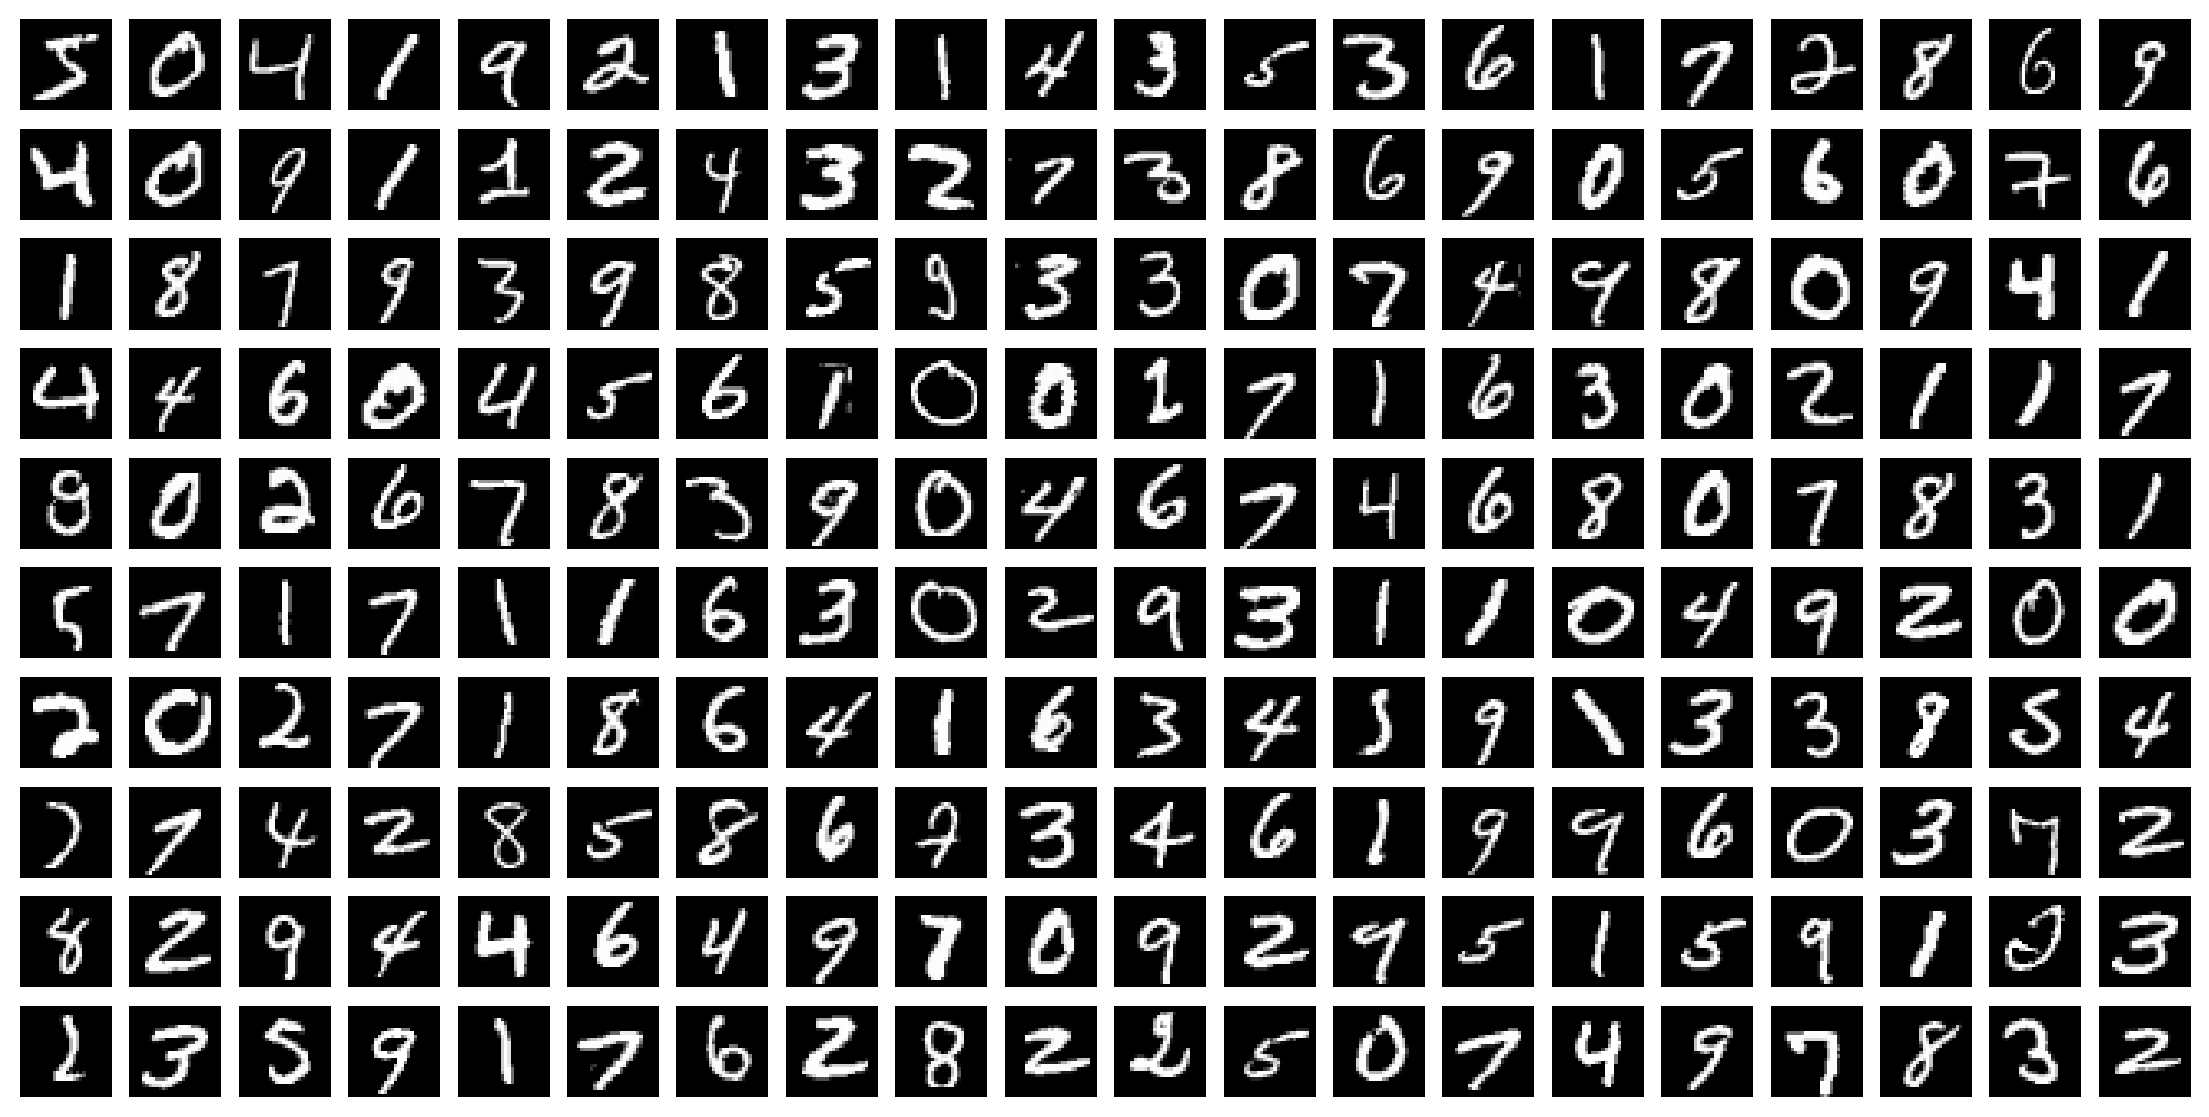

In [8]:
plt.figure(figsize=(14,7), dpi=200)
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')

In [9]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [10]:
print("Training data set : ", X_train.shape)
print("Test data set : ", X_test.shape)
print("Training labels : ", Y_train.shape)
print("Test labels : ", Y_test.shape)

Training data set :  (60000, 28, 28)
Test data set :  (10000, 28, 28)
Training labels :  (60000, 10)
Test labels :  (10000, 10)


In [11]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

## Data Augmentation

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    )
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, Y_train, batch_size = 500)

In [13]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_datagen.fit(X_test)
val_generator = val_datagen.flow(X_test, Y_test)

## Callback

In [15]:
threshold_accuracy = 0.98
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > threshold_accuracy):
      print("\nThe model has achieved the threshold of {}, Hence stop the training".format(threshold_accuracy))
      self.model.stop_training = True
my_callback = myCallback()

## Learning Rate Reduction

In [16]:
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(
    monitor= 'accuracy',
    factor=0.5,
    patience=2,
    verbose=1
)

## Steps to train a neural network
1. Create an architecture
2. Compile the model
3. Fit the  model

In [17]:
# Creating the architecture
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 605,010 (2.31 MB)

 Trainable params: 605,010 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [20]:
 # Fit the model
 history = model.fit(train_generator,
                     validation_data = val_generator,
                     epochs = 80,
                     verbose = 1,
                     callbacks = [my_callback, lr]
                     )

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.6765 - loss: 1.0150 - val_accuracy: 0.9403 - val_loss: 0.1968 - learning_rate: 0.0010
Epoch 2/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9325 - loss: 0.2194 - val_accuracy: 0.9654 - val_loss: 0.1116 - learning_rate: 0.0010
Epoch 3/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9515 - loss: 0.1618 - val_accuracy: 0.9706 - val_loss: 0.0971 - learning_rate: 0.0010
Epoch 4/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.9586 - loss: 0.1346 - val_accuracy: 0.9732 - val_loss: 0.0823 - learning_rate: 0.0010
Epoch 5/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9686 - loss: 0.1053 - val_accuracy: 0.9738 - val_loss: 0.0787 - learning_rate: 0.0010
Epoch 6/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.9679 - loss: 0.1036 - val_accuracy: 0.9802 - val_loss: 0.0646 - learning_rate: 0.0010
Epoch 7/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.9724 - loss:

In [21]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [22]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

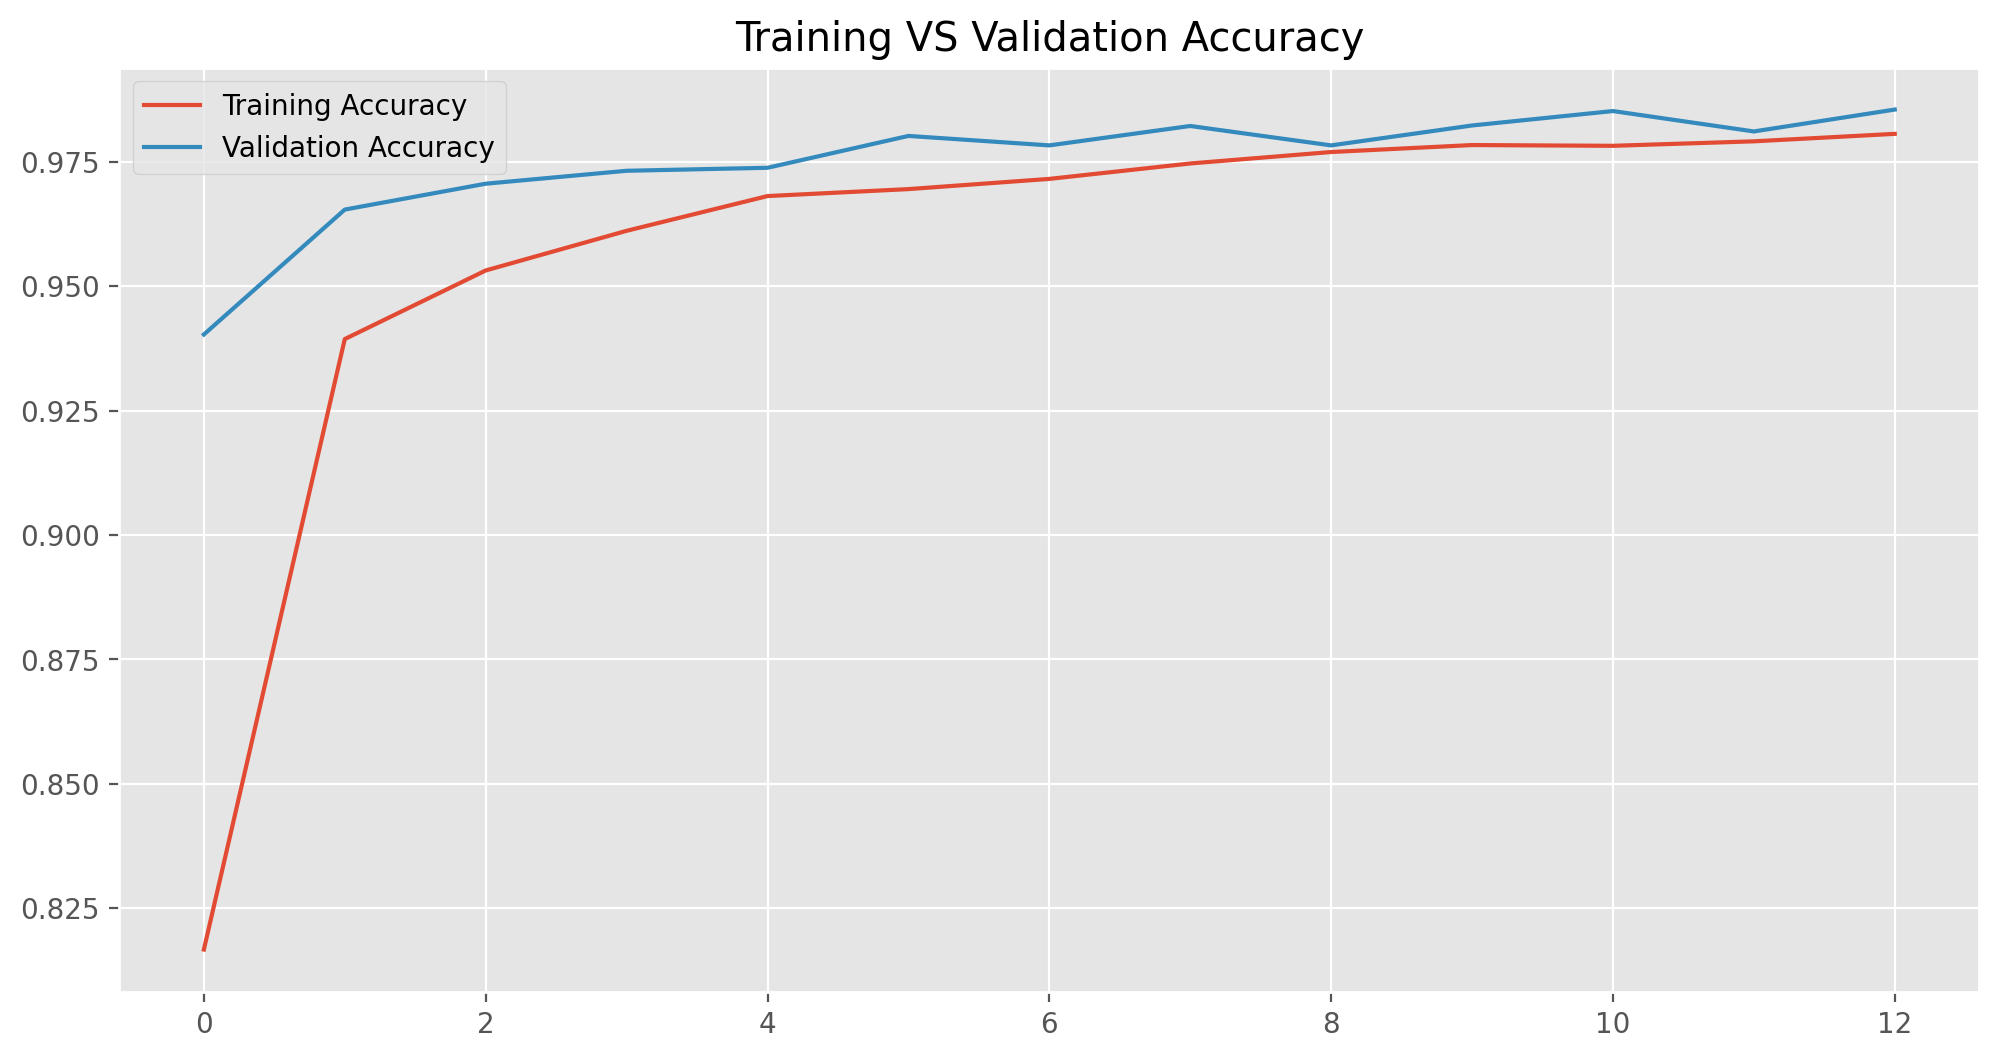

In [23]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("Training VS Validation Accuracy")
plt.legend()

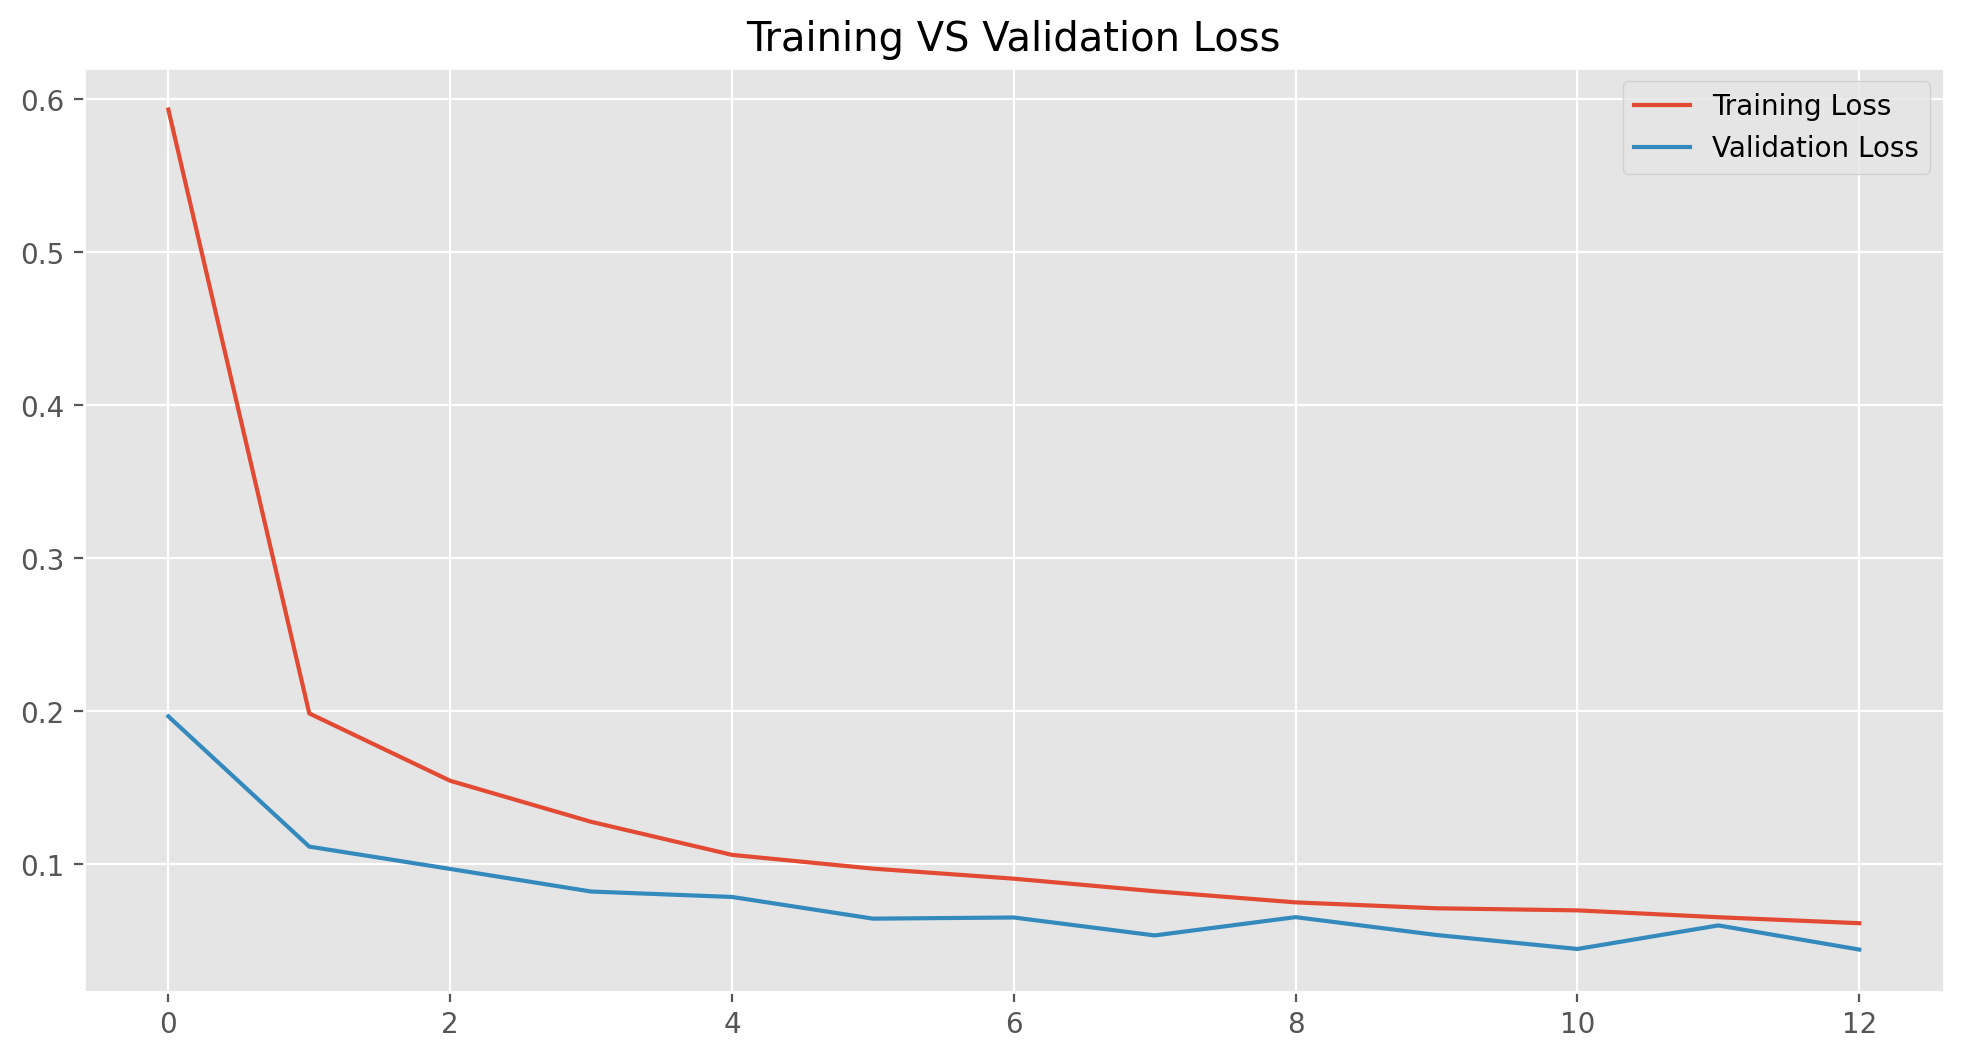

In [24]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Training VS Validation Loss")
plt.legend()

In [25]:
# Prediction
Y_pred = model.predict(X_test[0:1])
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [26]:
np.argmax(Y_pred, axis=1)

array([7])

In [27]:
np.argmax(model.predict(X_test[0:25]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4])

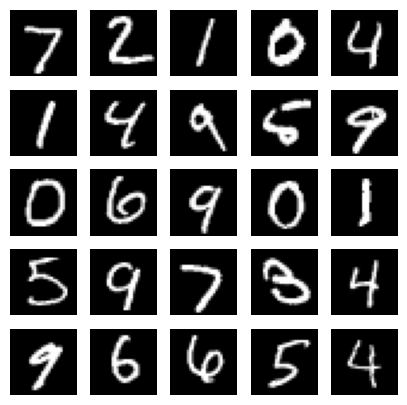

In [28]:
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X_test[i], cmap='gray')
  plt.axis('off')